In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("muted", 10))

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [4]:
print(train_df.shape)
print(test_df.shape)

(26729, 10)
(11456, 8)


In [5]:
train_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [7]:
train_df.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [8]:
test_df.isnull().sum()

ID                   0
Name              3225
DateTime             0
AnimalType           0
SexuponOutcome       0
AgeuponOutcome       6
Breed                0
Color                0
dtype: int64

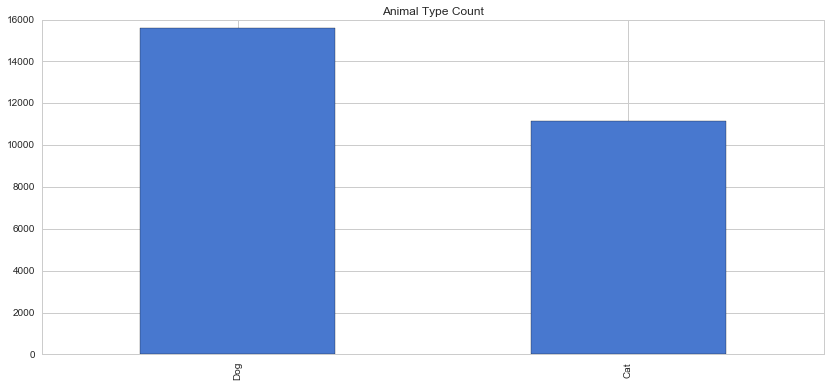

In [9]:
#animal type counts
train_df.AnimalType.value_counts().plot(kind='bar', figsize=(14, 6), title='Animal Type Count');

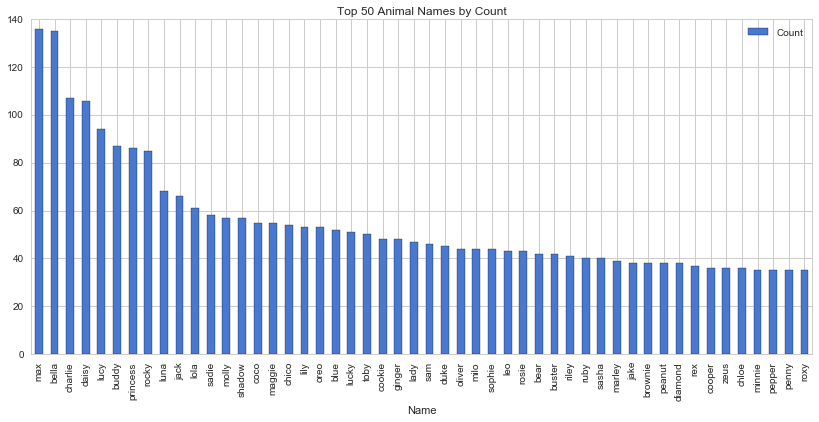

In [10]:
#top 50 animal names
from collections import Counter
top_names = pd.DataFrame(sorted(Counter(train_df.Name.str.lower().str.strip()).items(), 
                                key=lambda x: x[1], reverse=True)[1:51], columns=['Name', 'Count'])
top_names.plot(kind='bar', x='Name', y='Count', figsize=(14, 6), title='Top 50 Animal Names by Count');

In [11]:
datetime_df = train_df.DateTime.astype(str).str.replace(' .*', '').str.split("-", expand=True)
datetime_df.columns = ['Year', 'Month', 'Day']

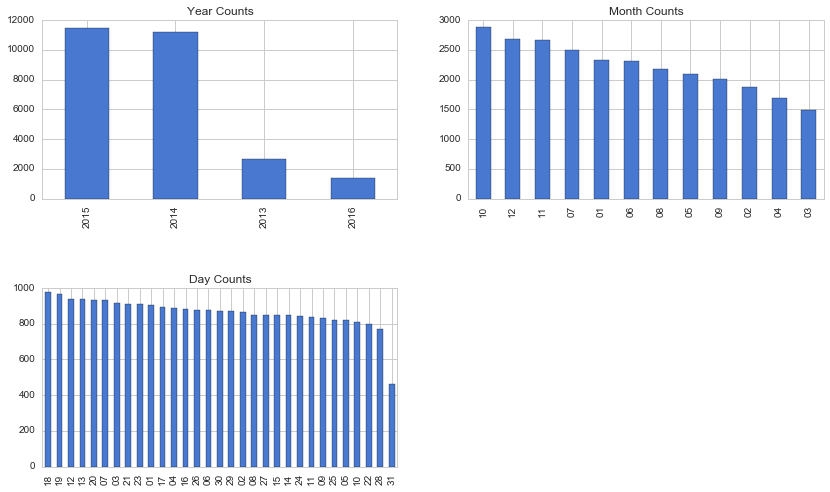

In [12]:
#split datetime column into years, months, and days, then plot
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
datetime_df.Year.value_counts().plot(kind='bar', ax=ax1, figsize=(14, 8), title='Year Counts')
datetime_df.Month.value_counts().plot(kind='bar', ax=ax2, figsize=(14, 8), title='Month Counts')
datetime_df.Day.value_counts().plot(kind='bar', ax=ax3, figsize=(14, 8), title='Day Counts')
ax4.set_visible(False)
f.subplots_adjust(hspace=.5)

In [13]:
train_df.AgeuponOutcome.str.extract('([A-Za-z]+)', expand=False).value_counts()

years     10874
months     8339
year       3969
weeks      1704
month      1281
days        332
week        146
day          66
Name: AgeuponOutcome, dtype: int64

In [14]:
import re
def convert_age(row):
    to_years = int(re.search('\d+', str(row)).group()) if re.search('\d+', str(row)) else None
    if 'year' in str(row):
        return to_years
    elif 'month' in str(row) or 'months' in str(row):
        return round(to_years / 12, 2)
    elif 'day' in str(row) or 'days' in str(row):
        return round(to_years / 365, 2)
    elif 'week' in str(row) or 'weeks' in str(row):
        return round(to_years / 52, 2)

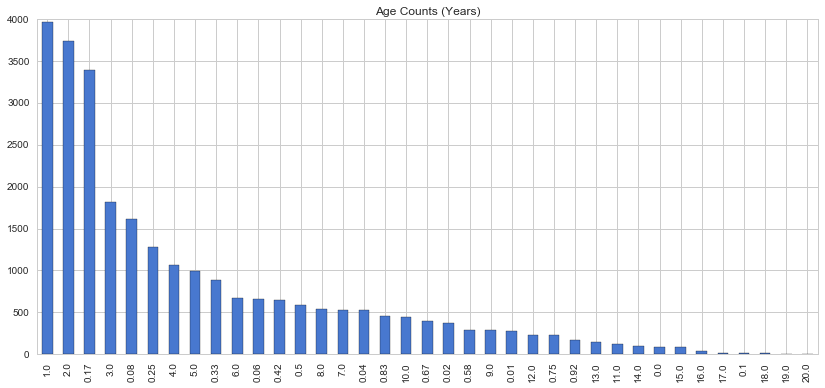

In [15]:
#convert age to years for each value in column and plot
age_to_years = train_df.AgeuponOutcome.apply(convert_age)
age_to_years.value_counts().plot(kind='bar', figsize=(14, 6), title='Age Counts (Years)');

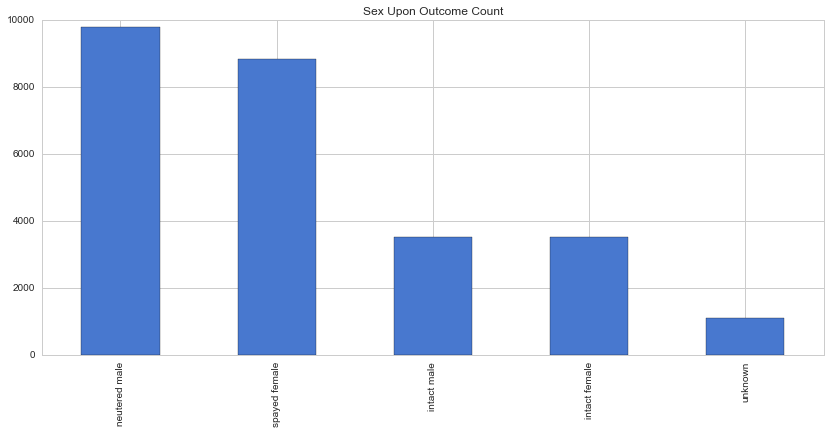

In [16]:
#plot sex of animals
train_df.SexuponOutcome.str.lower().str.strip().value_counts().plot(kind='bar', 
                                                                    figsize=(14, 6), 
                                                                    title='Sex Upon Outcome Count');

In [17]:
breed_word_count = sorted(Counter([x for word_list in train_df.Breed.str.lower().str.strip().str.split(expand=False) 
                            for x in word_list]).items(), key=lambda x: x[1], reverse=True)[:50]

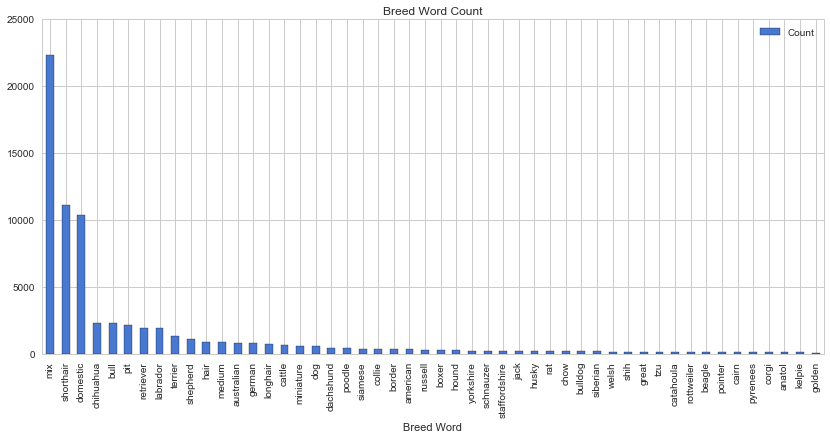

In [18]:
#plot breed count
pd.DataFrame(breed_word_count, columns=['Breed Word', 'Count']).plot(kind='bar', 
                                                                     x='Breed Word', 
                                                                     y='Count', 
                                                                     figsize=(14, 6), 
                                                                     title='Breed Word Count');

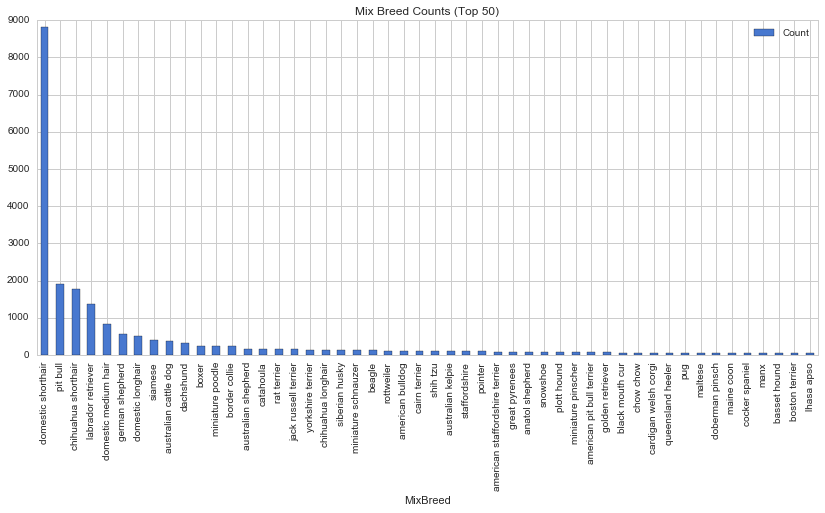

In [19]:
#lots of mixed species, so plot top 50 mixed breeds (both cats and dogs)
mix = train_df.loc[train_df.Breed.str.contains('Mix'), 'Breed']
mix_count = Counter(map(lambda x: x[0], mix.apply(lambda x: x.lower().rsplit(' ', 1))))
mix_df = pd.DataFrame({'MixBreed': list(mix_count.keys()), 'Count': list(mix_count.values())}).sort_values(by='Count', 
                                                                                                          ascending=False)
mix_df[:50].plot(kind='bar', x='MixBreed', y='Count', figsize=(14, 6), title='Mix Breed Counts (Top 50)');

In [20]:
color_count = sorted(Counter([x for word_list in train_df.Color.str.lower().str.strip().str.split(expand=False) 
                            for x in word_list]).items(), key=lambda x: x[1], reverse=True)[:50]

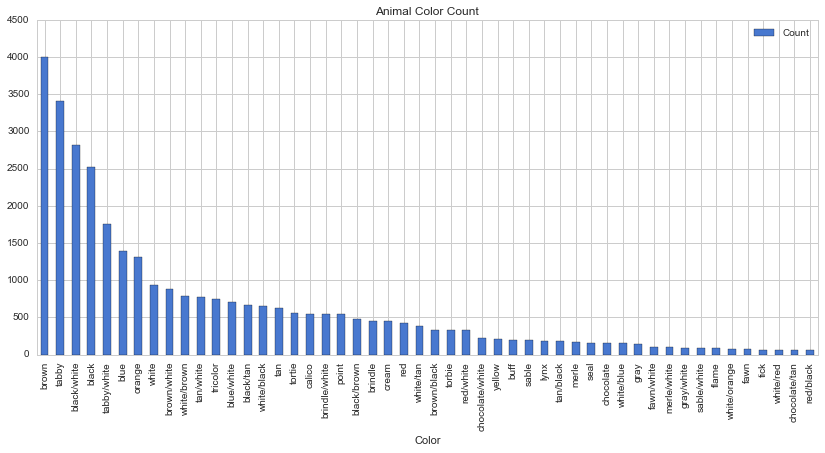

In [21]:
#plot top 50 colors
pd.DataFrame(color_count, columns=['Color', 'Count']).plot(kind='bar', x='Color', y='Count', figsize=(14, 6), 
                                                          title='Animal Color Count');

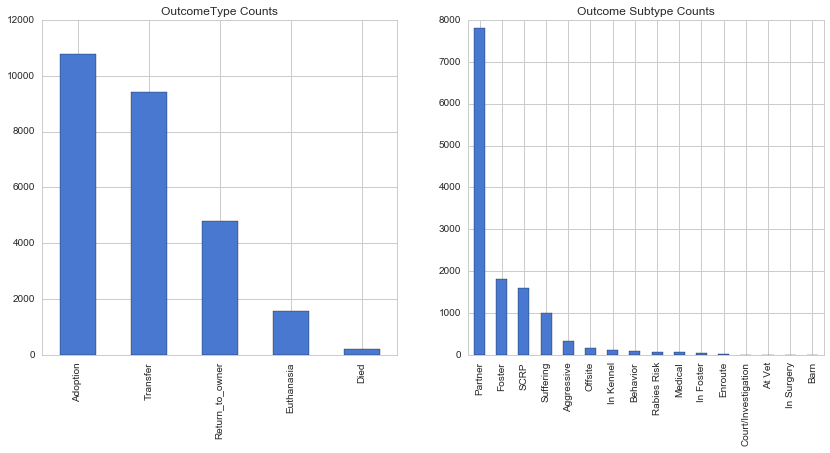

In [22]:
#plot outcome types and subtypes
f, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
train_df.OutcomeType.value_counts().plot(kind='bar', ax=ax1, title='OutcomeType Counts', figsize=(14, 6));
train_df.OutcomeSubtype.value_counts().plot(kind='bar', ax=ax2, title='Outcome Subtype Counts', figsize=(14, 6));

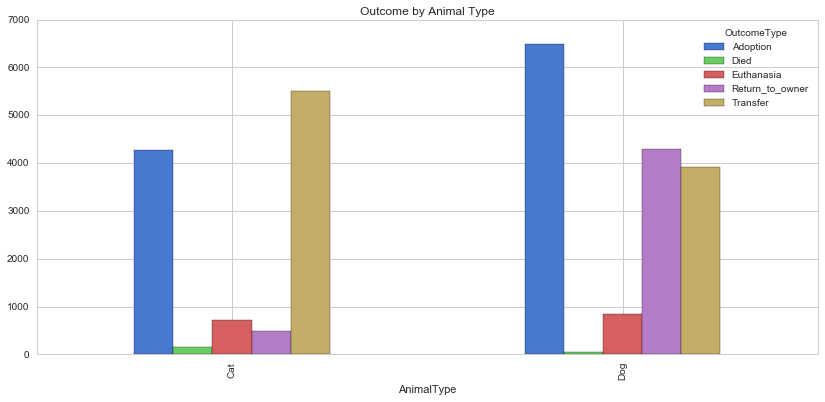

In [23]:
#plot outcome by animal type
train_df.groupby(['AnimalType', 'OutcomeType']).AnimalID.count().unstack('OutcomeType').plot(kind='bar', 
                                                                                             figsize=(14, 6), 
                                                                                             title='Outcome by Animal Type');

In [24]:
df = train_df[['AnimalID', 'OutcomeType', 'AgeuponOutcome']]
df.AgeuponOutcome = df.AgeuponOutcome.apply(convert_age)

C:\Users\Blake\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


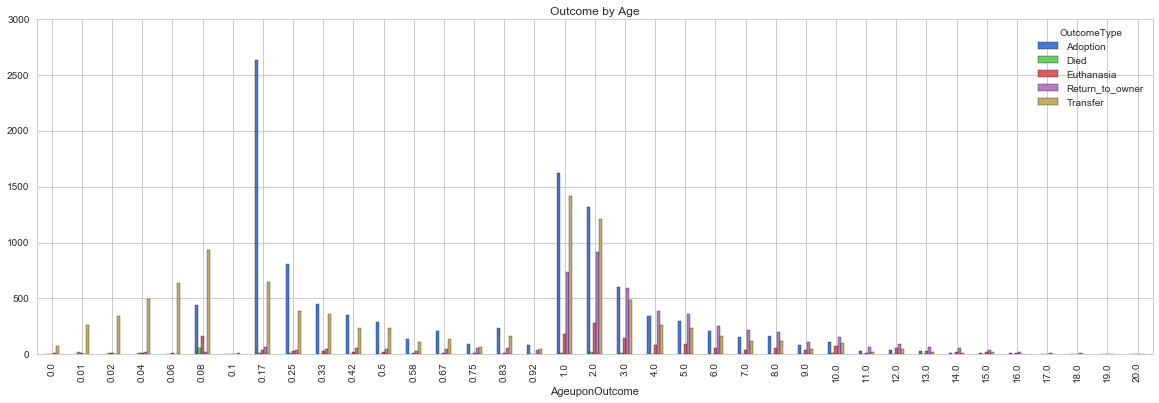

In [25]:
#plot outcome by animal age
df.groupby(['AgeuponOutcome', 'OutcomeType']).AnimalID.count().unstack('OutcomeType').plot(kind='bar',
                                                                                           figsize=(20, 6), 
                                                                                           title='Outcome by Age');

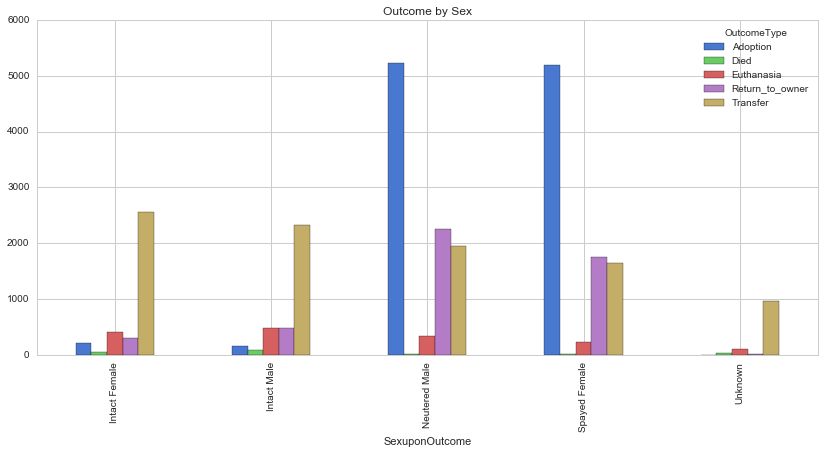

In [26]:
#plot outcome by sex
train_df.groupby(['SexuponOutcome', 'OutcomeType']).AnimalID.count().unstack('OutcomeType').plot(kind='bar', 
                                                                                                 figsize=(14, 6), 
                                                                                                 title='Outcome by Sex');

In [27]:
no_null_names = train_df[~train_df.Name.isnull()]
no_null_names.Name.str.contains('|'.join(list(set(top_names.Name)))).value_counts()

False    18989
True        49
Name: Name, dtype: int64

In [28]:
no_null_names['ContainsTop50Names'] = no_null_names.Name.str.lower().str.strip().str.contains('|'.join((set(top_names.Name))))

C:\Users\Blake\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


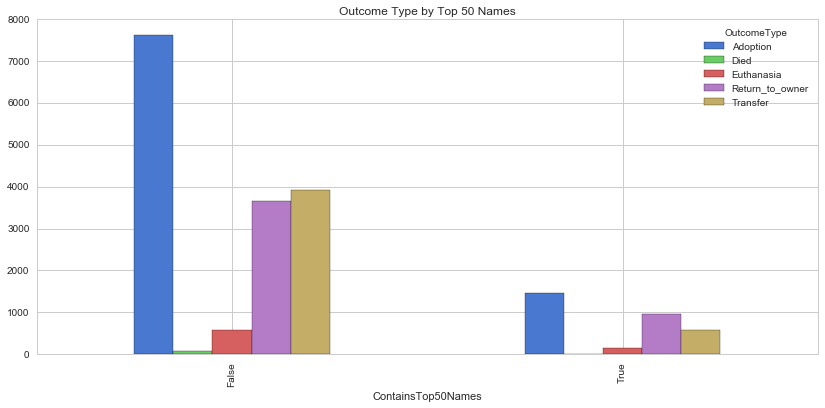

In [29]:
#plot outcome by top 50 names
no_null_names.groupby(['OutcomeType', 'ContainsTop50Names'])\
    .count().unstack('OutcomeType').AnimalID.plot(kind='bar',
                                                  figsize=(14, 6), 
                                                  title='Outcome Type by Top 50 Names');

In [30]:
top_breed_df = pd.DataFrame(breed_word_count, columns=['Breed Name', 'Count'])

In [31]:
train_df['TopBreed'] = train_df.Breed.str.lower().str.strip().str.contains('|'.join(set(top_breed_df['Breed Name'])))

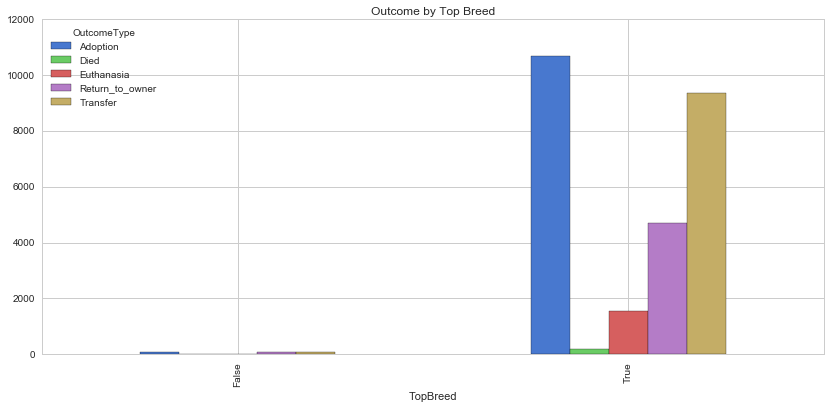

In [32]:
#plot outcome by top breeds
train_df.groupby(['TopBreed', 'OutcomeType']).count().unstack('OutcomeType').AnimalID.plot(kind='bar', 
                                                                                           figsize=(14, 6), 
                                                                                           title = 'Outcome by Top Breed');

In [33]:
train_df['BreedCategory'] = 'other'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('pit|pitbull|pit bull'), 'BreedCategory'] = 'pitbull'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('mix'), 'BreedCategory'] = 'mix'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('domestic longhair'), 'BreedCategory'] = 'domestic longhair'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('domestic shorthair'), 'BreedCategory'] = 'domestic shorthair'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('chihuahua'), 'BreedCategory'] = 'chihuahua'

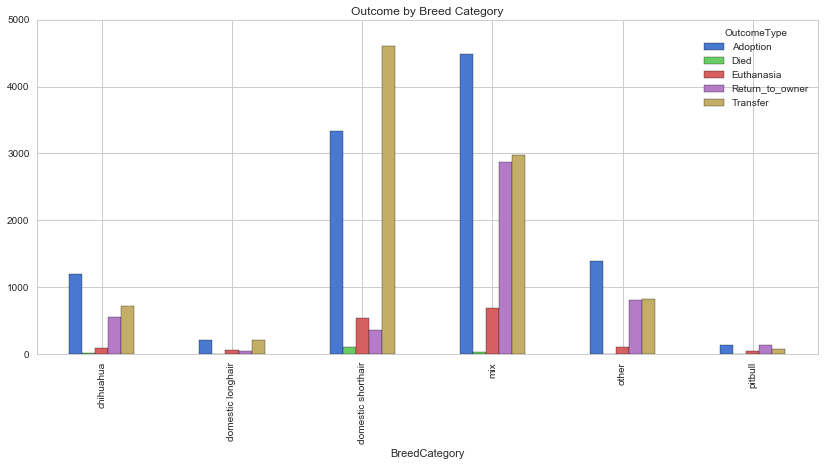

In [34]:
#plot outcomes by most common breeds (mix, pitbull, domestic longhair, domestic shorthair, chihuahua)
train_df.groupby(['OutcomeType', 'BreedCategory'])\
.count().unstack('OutcomeType').AnimalID.plot(kind='bar', 
                                              figsize=(14, 6), 
                                              title='Outcome by Breed Category');

In [35]:
train_df['MixCategory'] = 'Other'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('domestic longhair'), 'MixCategory'] = 'domestic longhair'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('domestic shorthair'), 'MixCategory'] = 'domestic shorthair'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('pit bull|pitbull'), 'MixCategory'] = 'pitbull'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('chihuahua shorthair'), 'MixCategory'] = 'chihuahua shorthair'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('labrador retriever'), 'MixCategory'] = 'labrador retriever'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('domestic medium ?hair'), 'MixCategory'] = 'domestic mediumhair'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('german shepherd'), 'MixCategory'] = 'german shepherd'
train_df.loc[train_df.Breed.str.lower().str.strip().str.contains('siamese'), 'MixCategory'] = 'siamese'

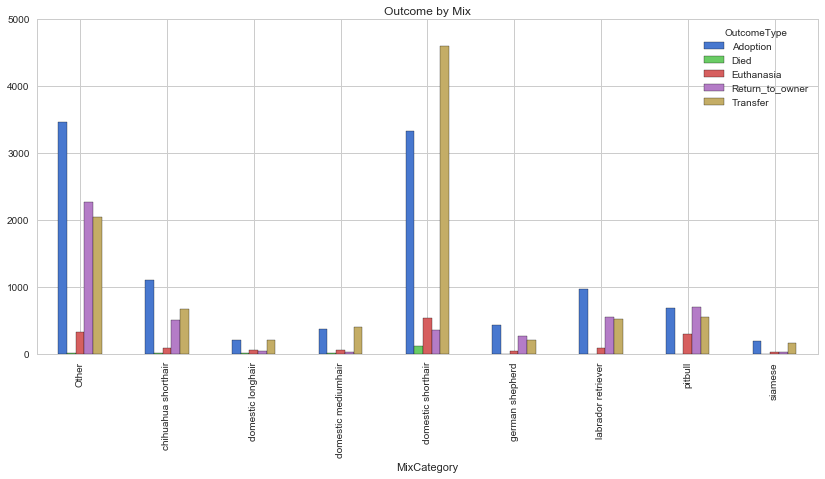

In [36]:
#plot outcome by most common mix breeds
train_df.groupby(['OutcomeType', 'MixCategory']).count().unstack('OutcomeType').AnimalID.plot(kind='bar', 
                                                                                              figsize=(14, 6), 
                                                                                              title='Outcome by Mix');

In [37]:
datetime_df = train_df.DateTime.astype(str).str.replace(' .*', '').str.split("-", expand=True)
datetime_df.columns = ['Year', 'Month', 'Day']
time_df = pd.concat([train_df[['AnimalID', 'DateTime', 'OutcomeType']], datetime_df], axis=1)

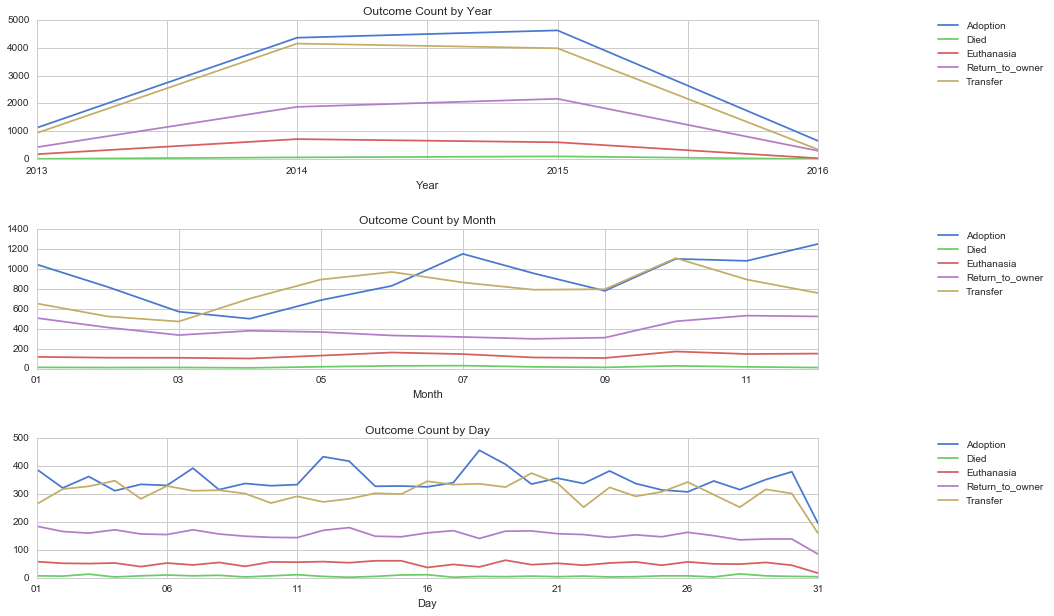

In [38]:
#plot outcome by month, day, and year
f, ((ax1, ax2, ax3)) = plt.subplots(ncols=1, nrows=3, sharex=False, sharey=False)
time_df.groupby(['Year', 'OutcomeType']).count().AnimalID.unstack('OutcomeType').plot(kind='line', figsize=(14, 10), ax=ax1)
time_df.groupby(['Month', 'OutcomeType']).count().AnimalID.unstack('OutcomeType').plot(kind='line', figsize=(14, 10), ax=ax2)
time_df.groupby(['Day', 'OutcomeType']).count().AnimalID.unstack('OutcomeType').plot(kind='line', figsize=(14, 10), ax=ax3)
f.subplots_adjust(hspace=.5)
ax1.set_title('Outcome Count by Year')
ax2.set_title('Outcome Count by Month')
ax3.set_title('Outcome Count by Day')
ax1.legend(bbox_to_anchor=(1.3, 1.05))
ax2.legend(bbox_to_anchor=(1.3, 1.05))
ax3.legend(bbox_to_anchor=(1.3, 1.05));

In [39]:
no_hours = train_df[['AnimalID', 'OutcomeType', 'DateTime']]
no_hours.DateTime = no_hours.DateTime.astype(str).str.replace(' .*', '')

C:\Users\Blake\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


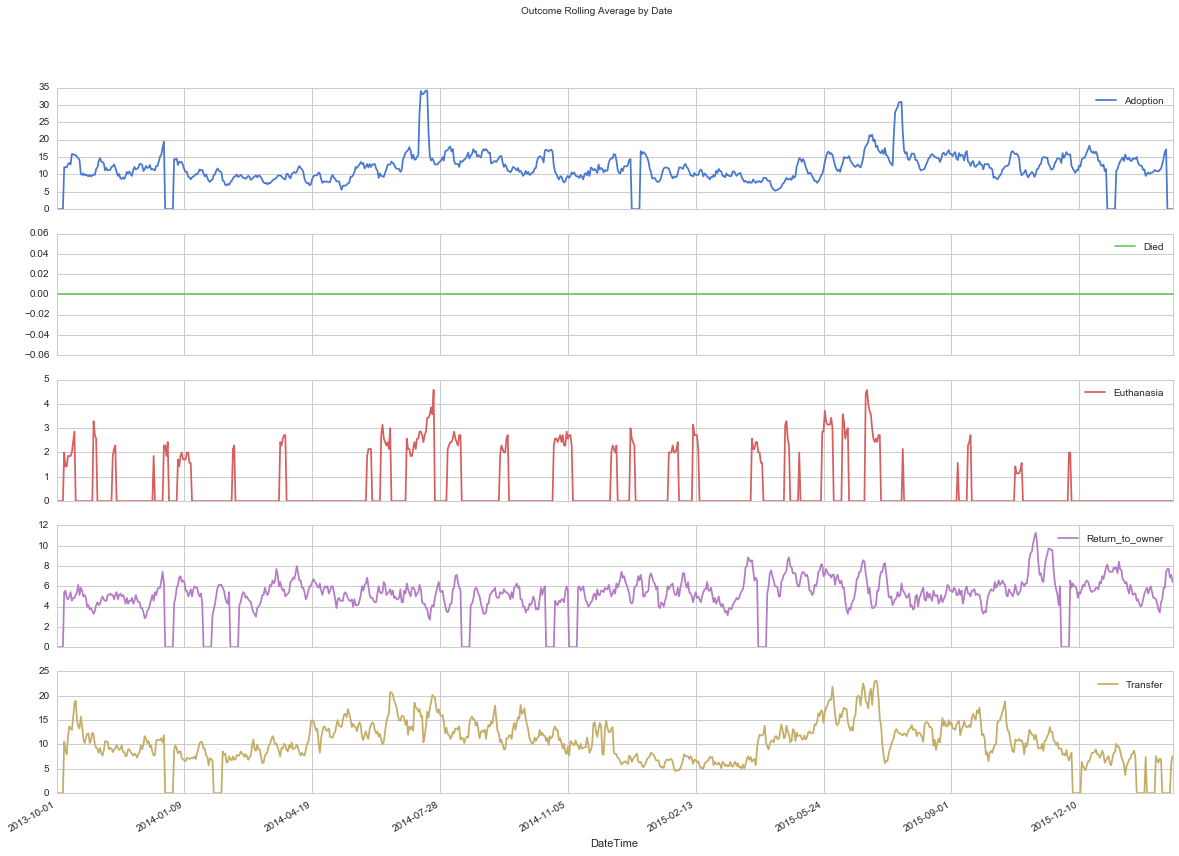

In [40]:
#plot outcome rolling average by 7 day window of datetime
no_hours.groupby(['OutcomeType', 'DateTime'])\
    .count().unstack('OutcomeType').AnimalID.rolling(window=7)\
    .mean().fillna(0).plot(kind='line', 
                           figsize=(20, 14), 
                           subplots=True, 
                           title='Outcome Rolling Average by Date');